# Exploratory Data Analysis

In [1]:
import sys
import pandas as pd
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
from utils.visualizations import Visualization

# Data

In [2]:
df = pd.read_csv("./Data/Abandono_clientes.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Columns like `RowNumber`, `CustomerId` and `Surname` can be dropped, since they wont give us any insight

In [3]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
visualizer = Visualization(df)

# Univariate Analysis

## Numerical Columns

In [6]:
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df[numerical_columns].describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

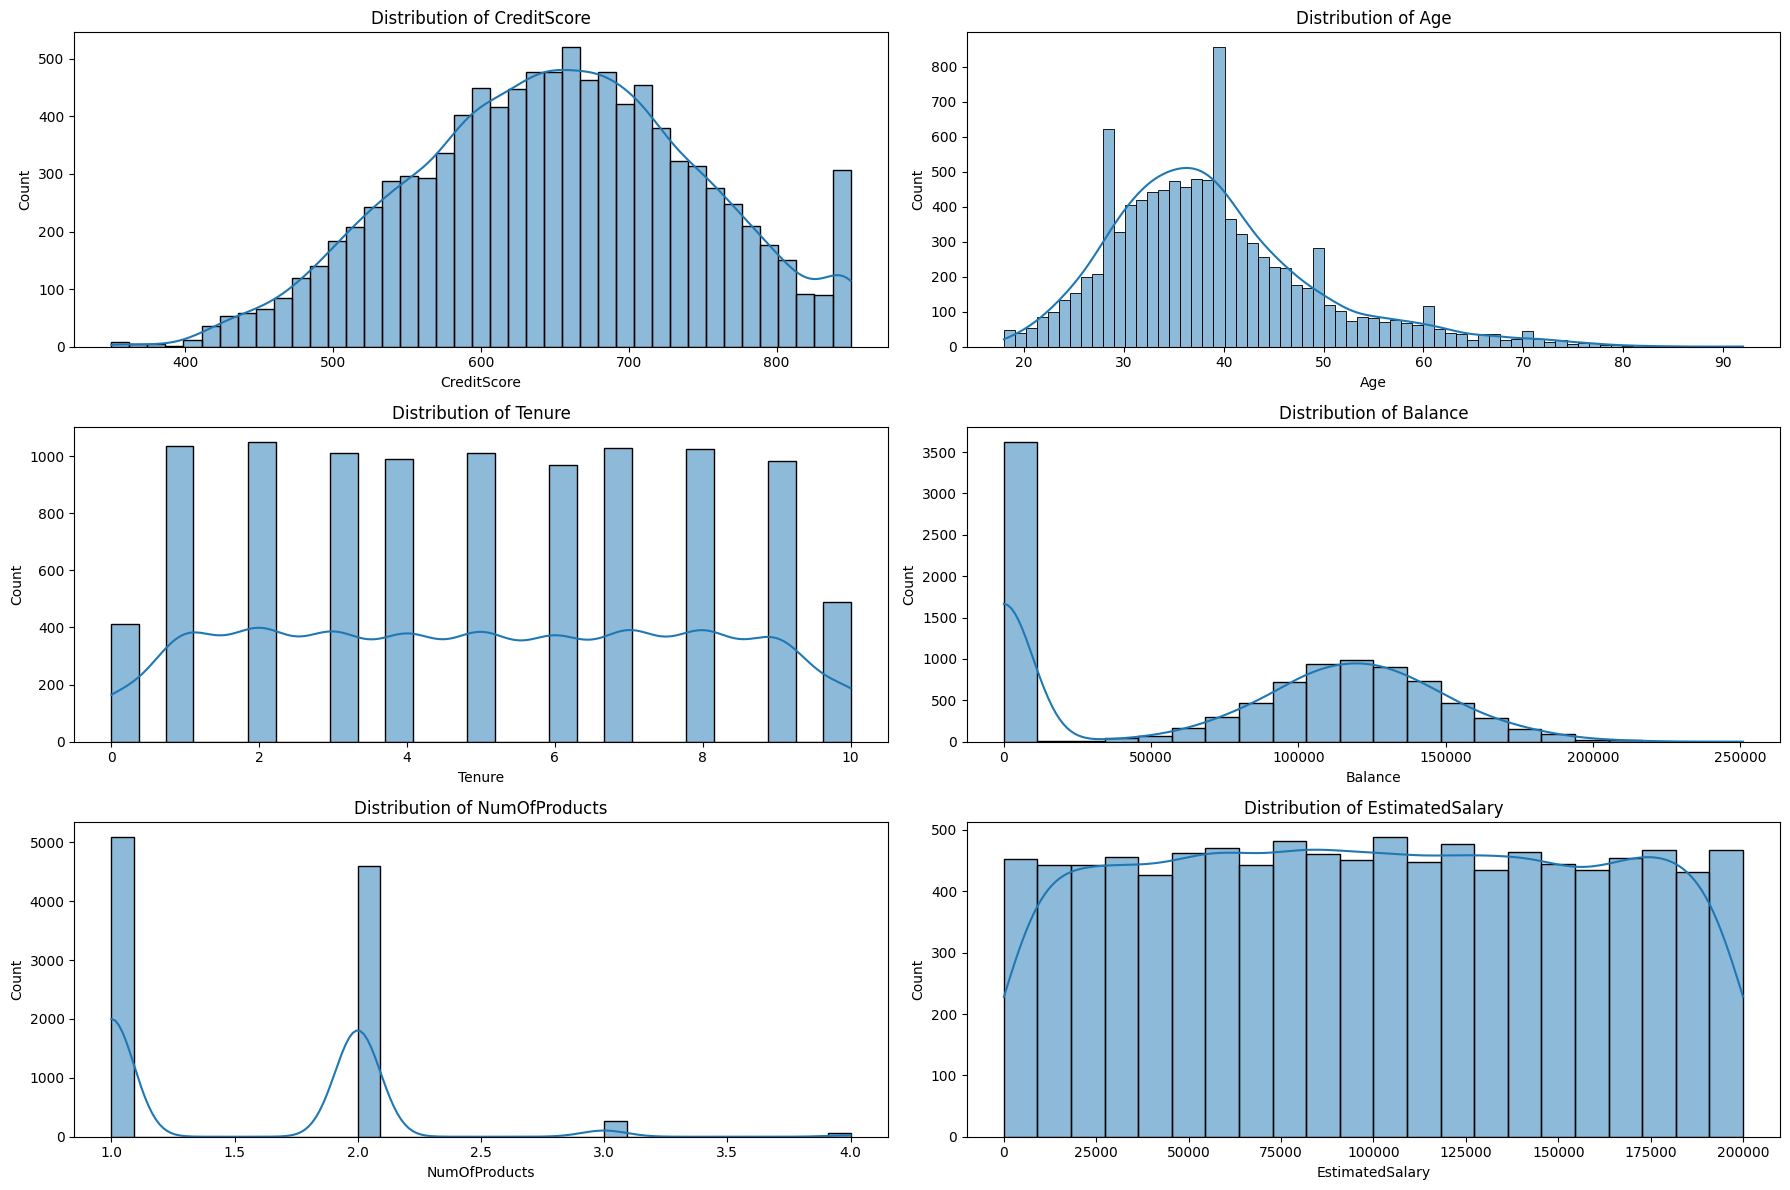

In [7]:
visualizer.num_univariate_analysis(numerical_columns, 3, 2)

In [8]:
df["Exited"].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

### Observations:

### Impact:

## Categorical Columns

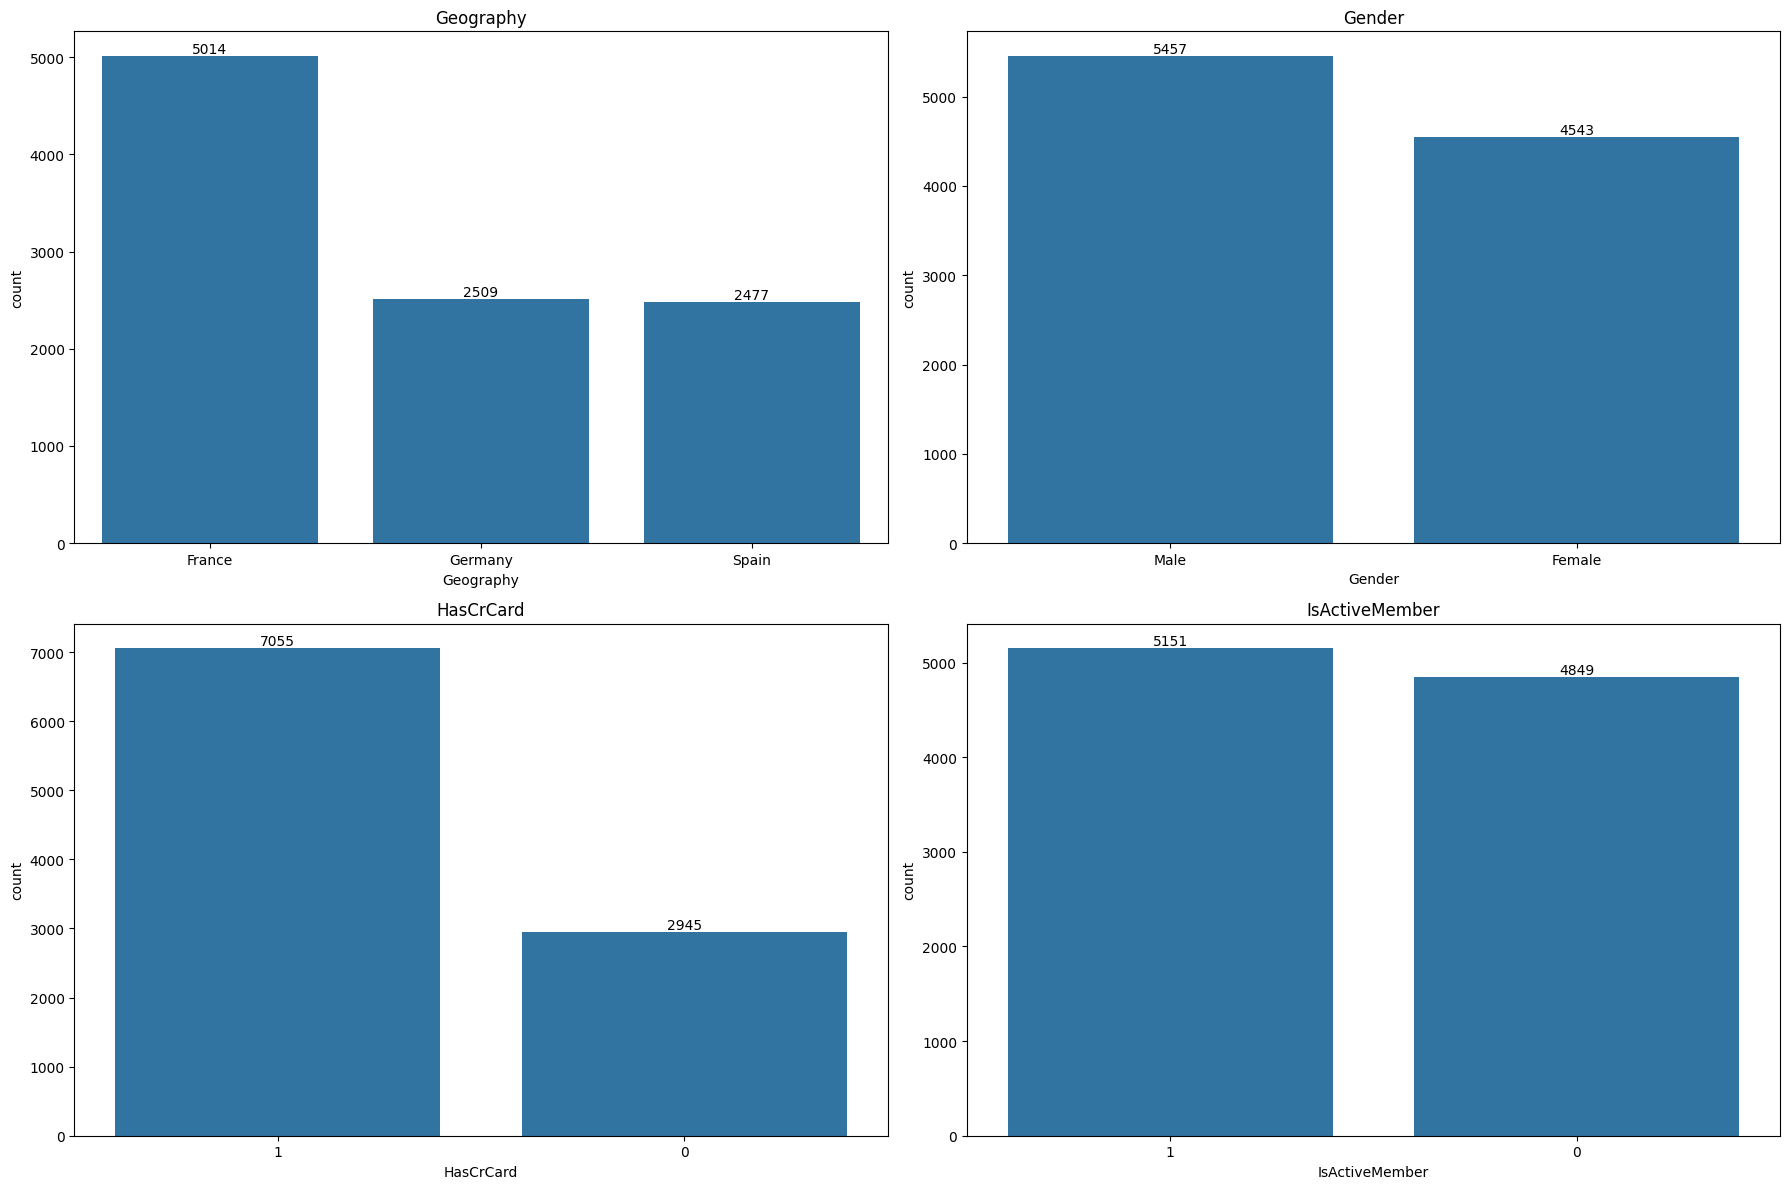

In [9]:
cat_columns = df.select_dtypes(include="object").columns.tolist() + ["HasCrCard", "IsActiveMember"]
visualizer.cat_univariate_analysis(cat_columns, 2, 2)

### Observations:

### Impact:

# Features x Target

## Numerical Features

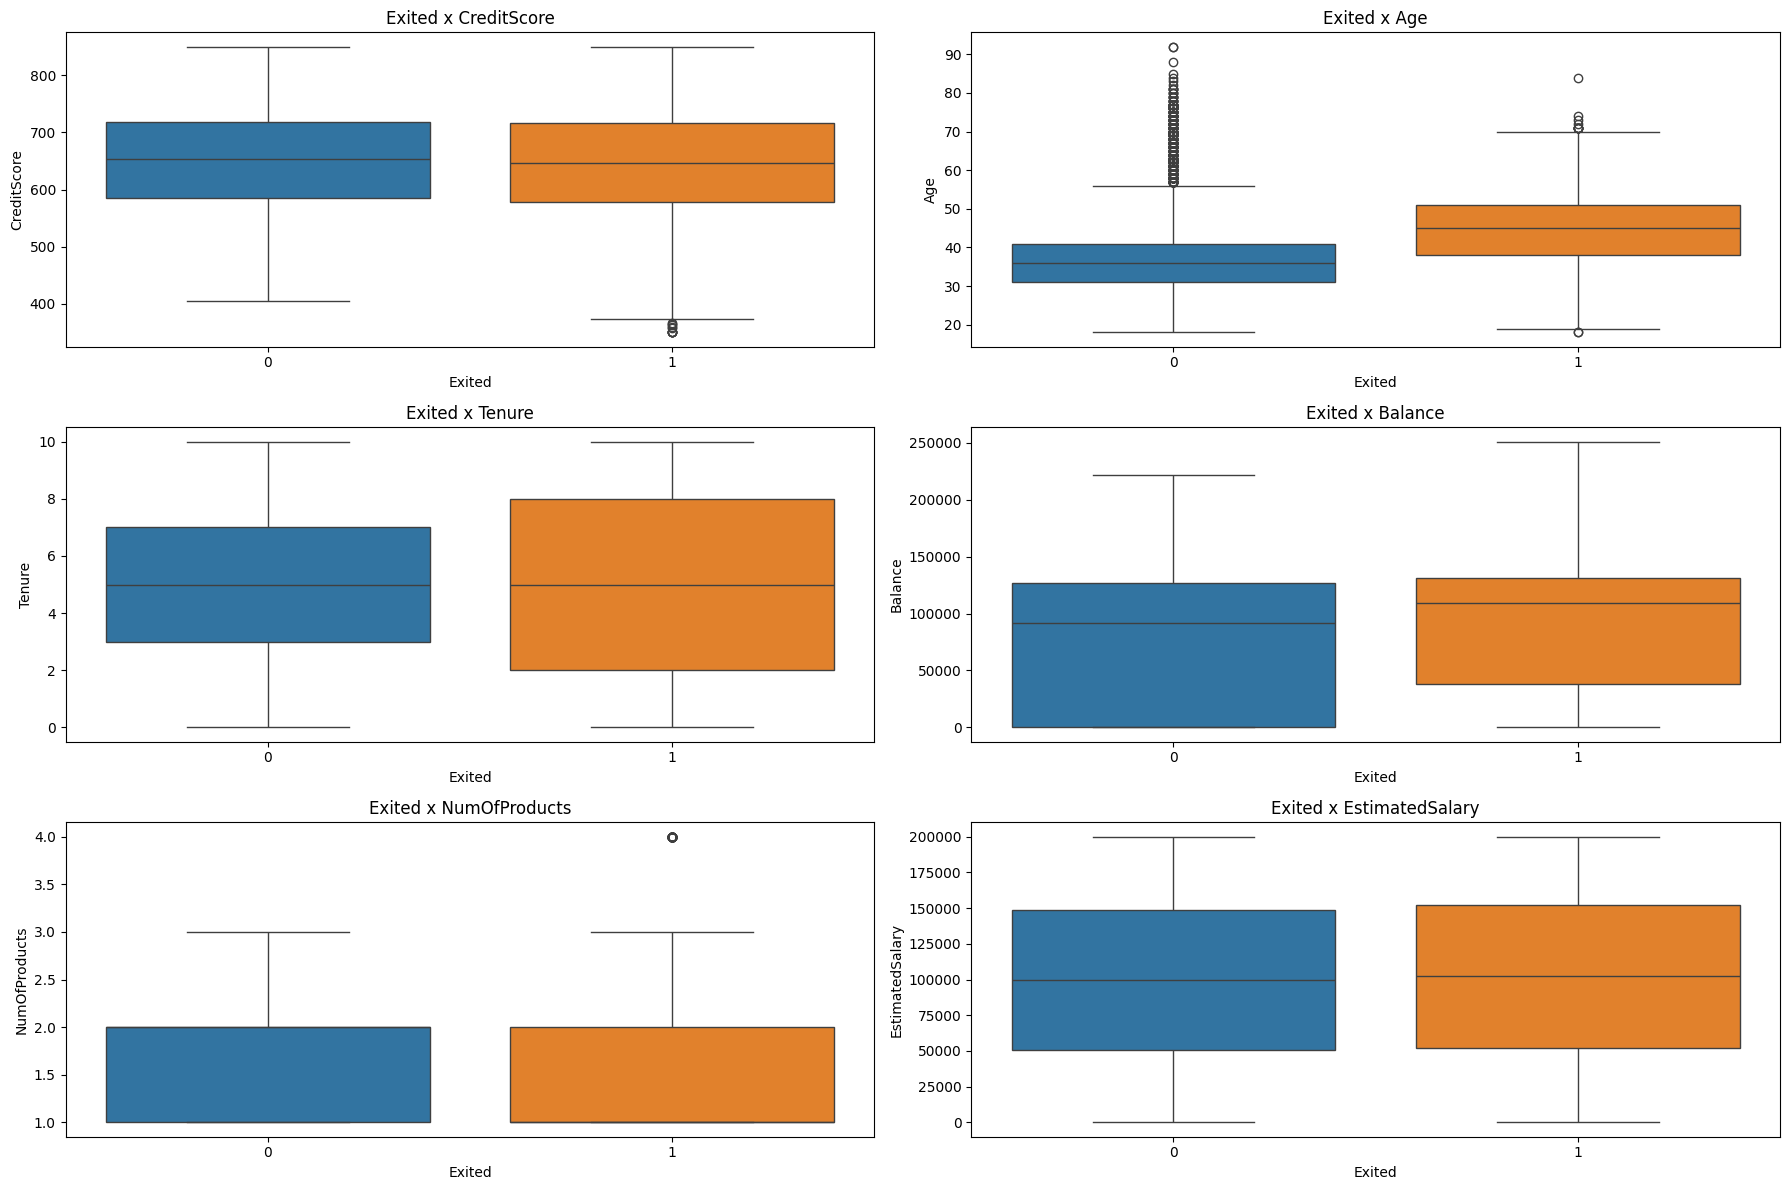

In [10]:
visualizer.num_features_vs_target(3, 2, "Exited", numerical_columns, "boxplot")

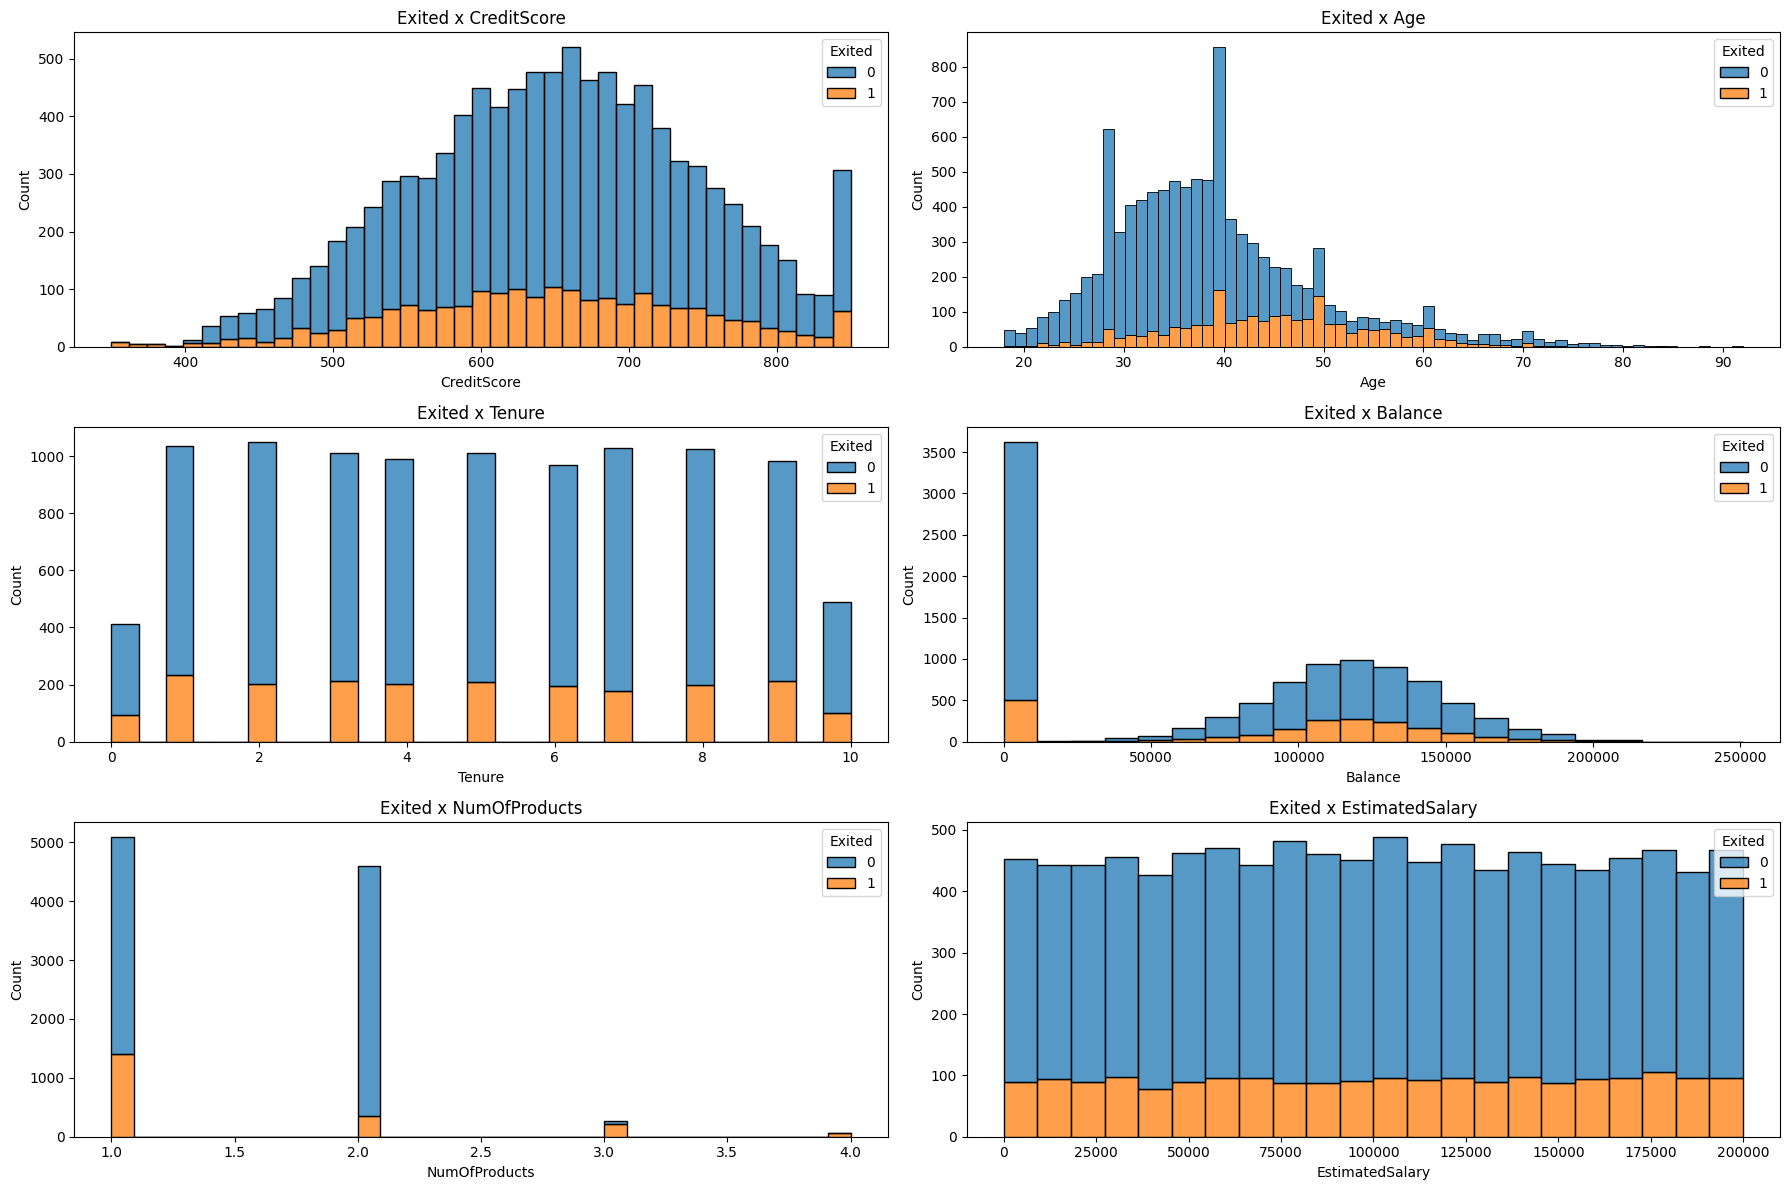

In [11]:
visualizer.num_features_vs_target(3, 2, "Exited", numerical_columns, "histplot")

In [12]:
df["NumOfProducts"].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
for col in df[["Tenure", "NumOfProducts"]]:
    print(df.groupby(col)["Exited"].mean().reset_index())

    Tenure    Exited
0        0  0.230024
1        1  0.224155
2        2  0.191794
3        3  0.211100
4        4  0.205258
5        5  0.206522
6        6  0.202689
7        7  0.172179
8        8  0.192195
9        9  0.216463
10      10  0.206122
   NumOfProducts    Exited
0              1  0.277144
1              2  0.075817
2              3  0.827068
3              4  1.000000


### Observations:

### Impact:

## Categorical Features

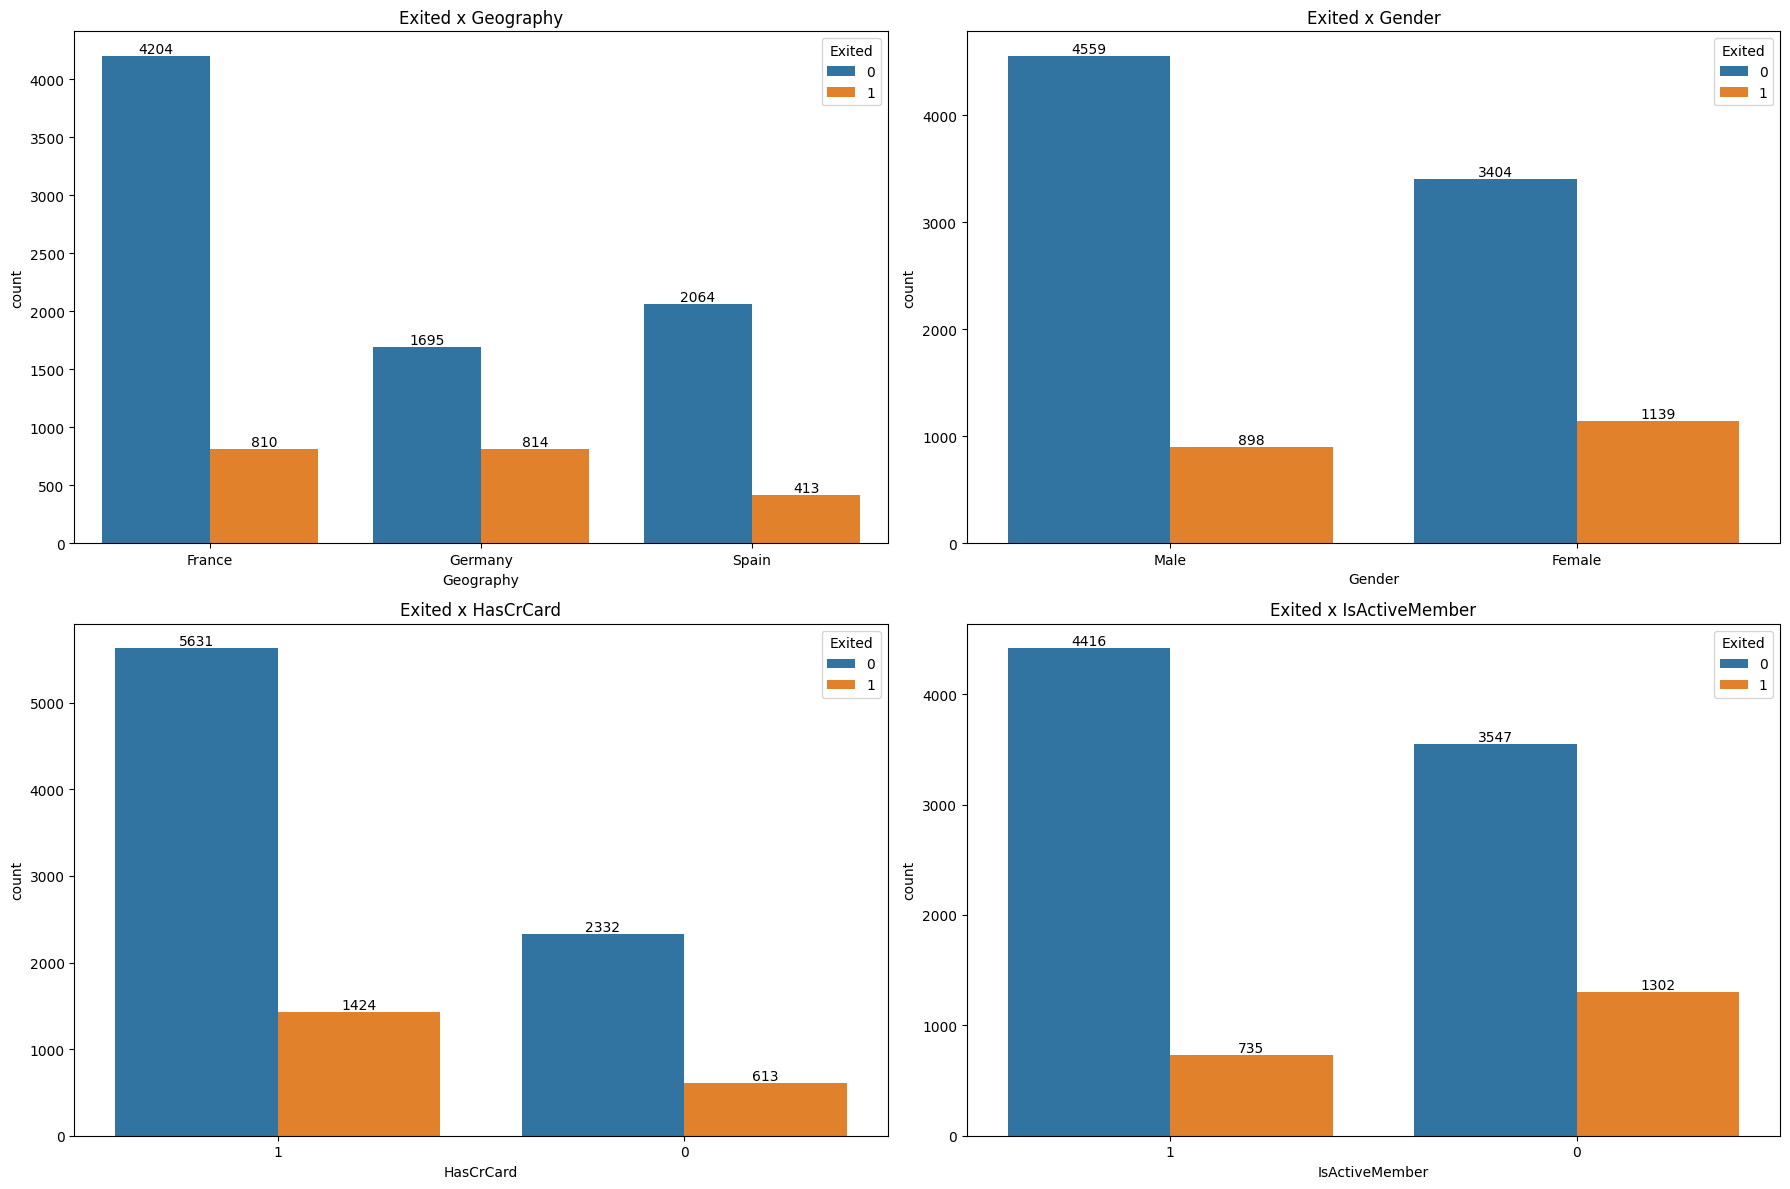

In [14]:
visualizer.cat_features_vs_target(2, 2, "Exited", cat_columns, "countplot")

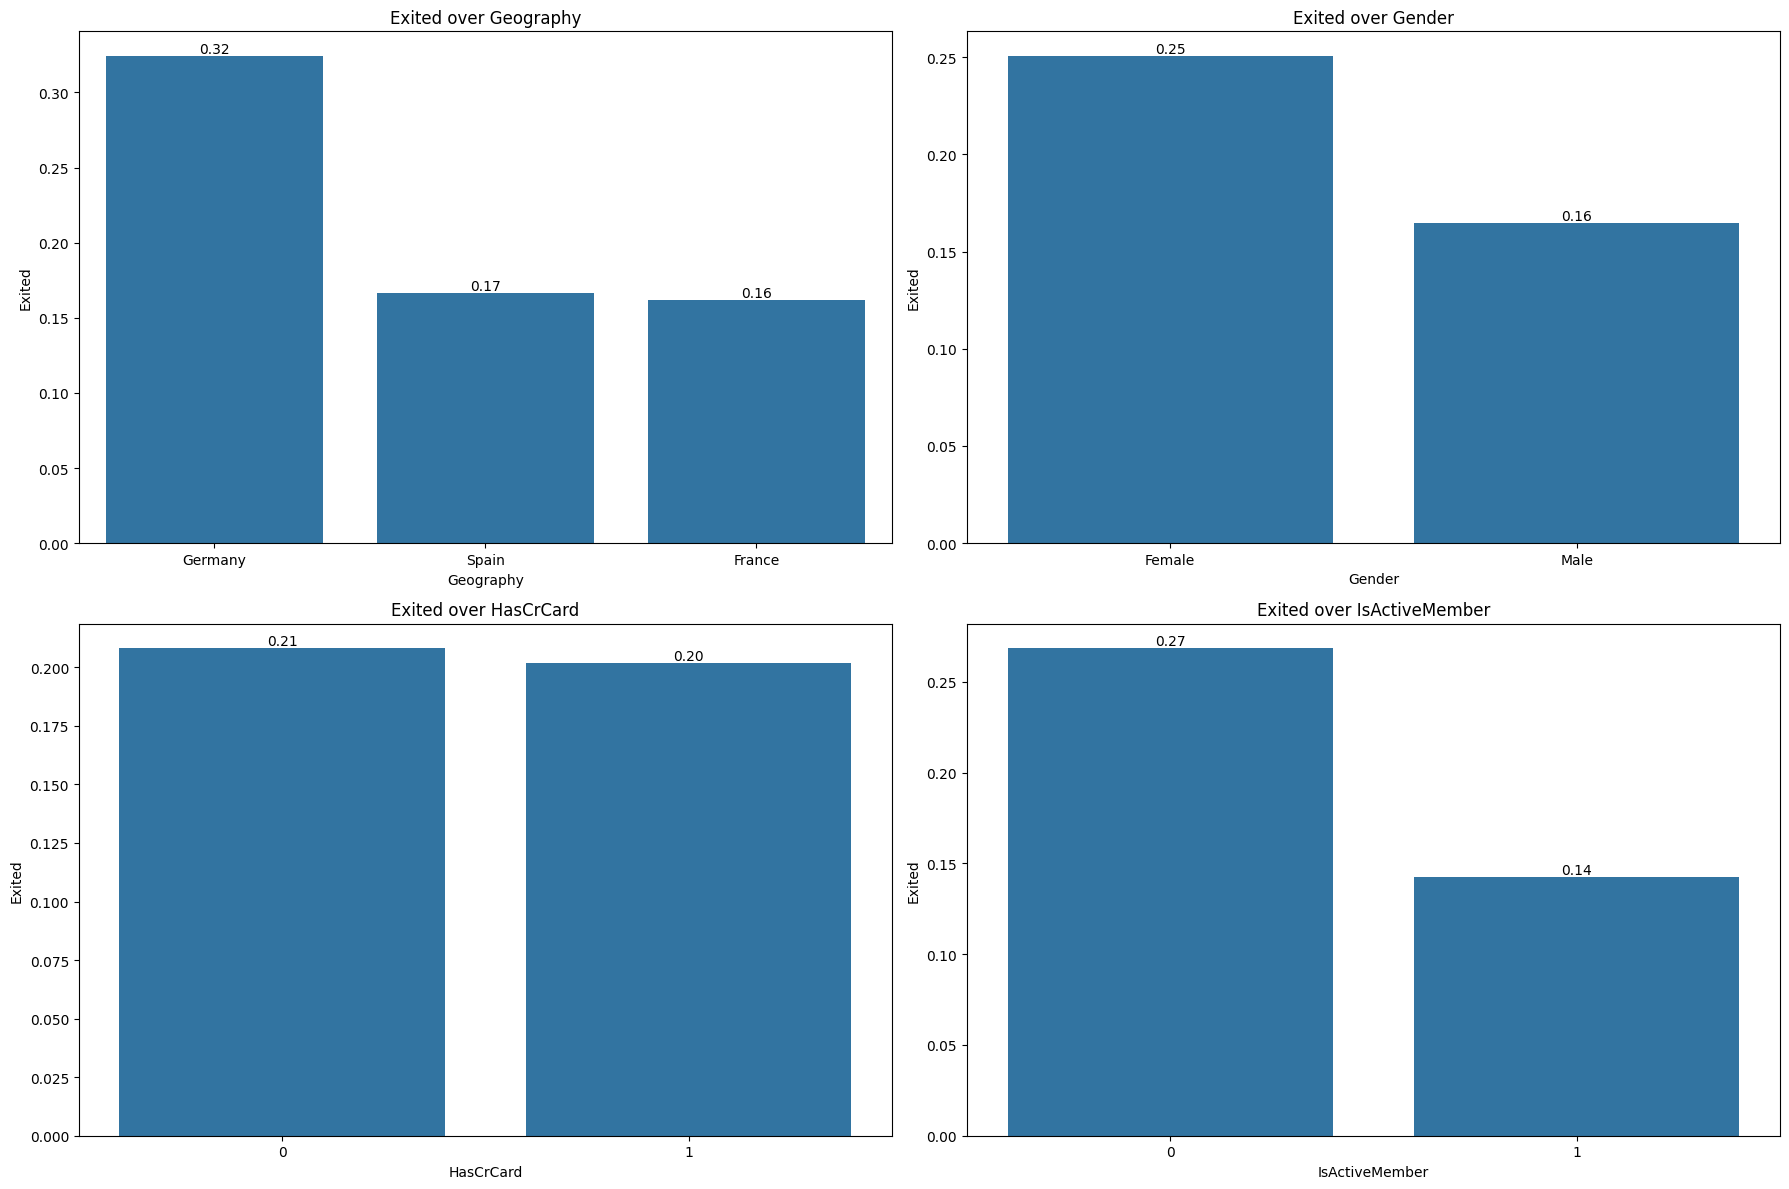

In [15]:
visualizer.cat_features_vs_target(2, 2, "Exited", cat_columns, "barplot")

### Observations:

### Impact:

# Multivariable Analysis

## Geography x Numericals

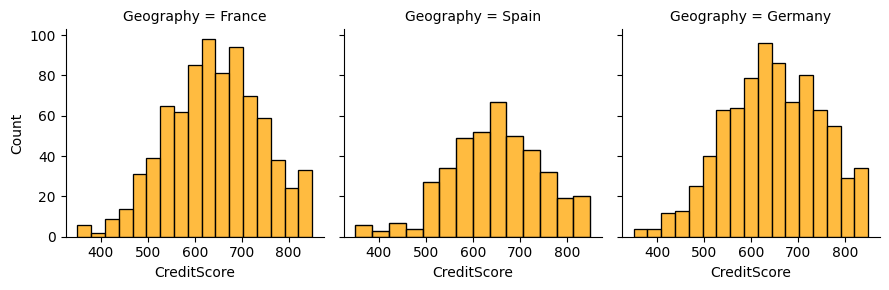

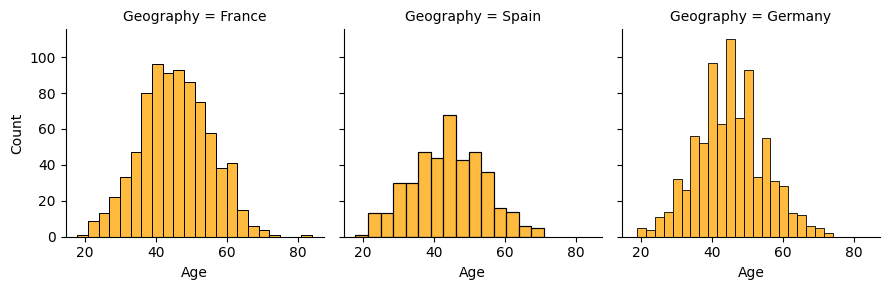

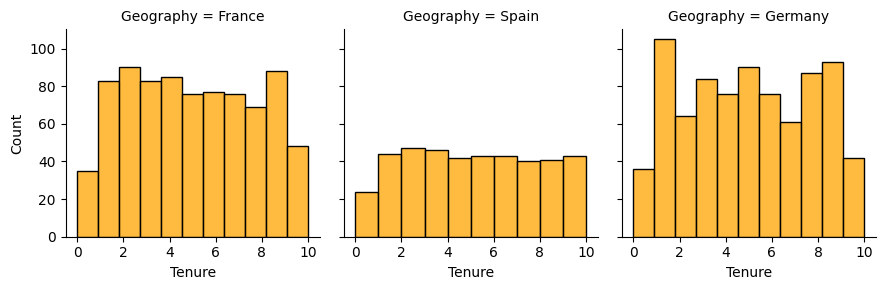

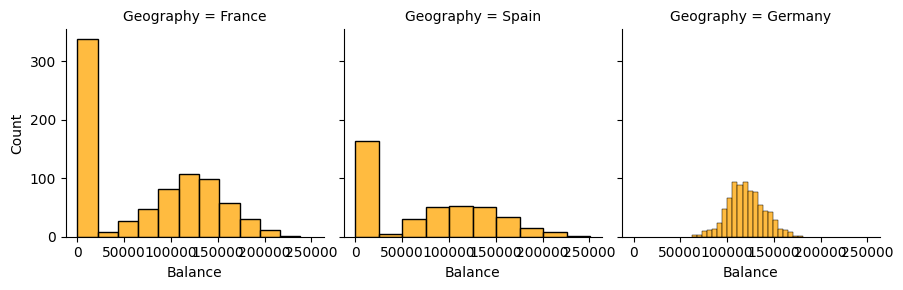

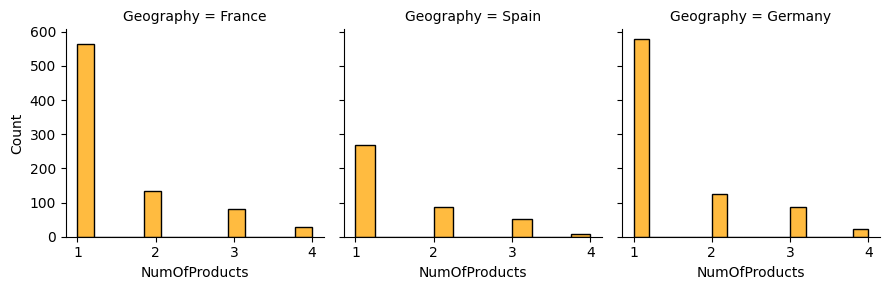

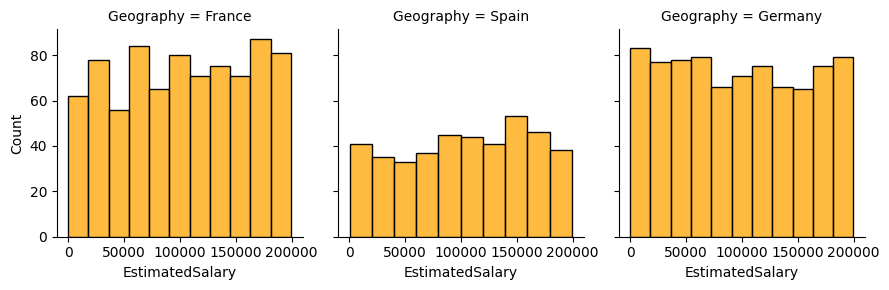

In [16]:
visualizer.facegrid_hist_target(facecol="Geography", color="orange", cols=numerical_columns, target="Exited")

## Gender x Numericals

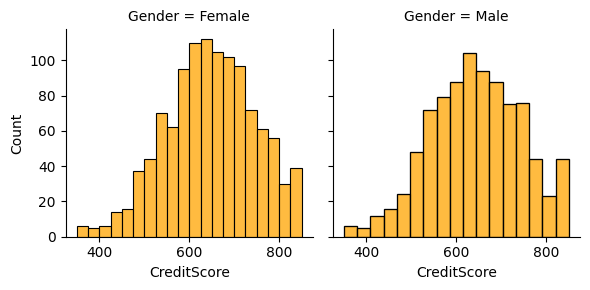

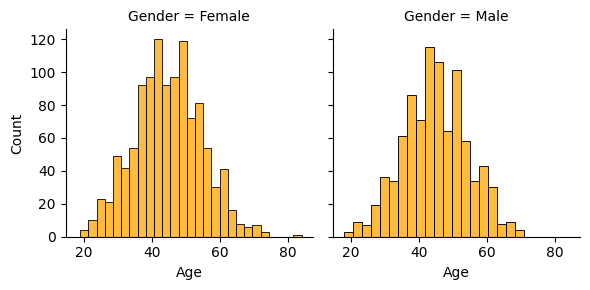

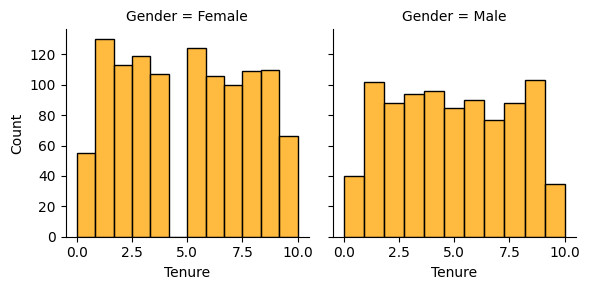

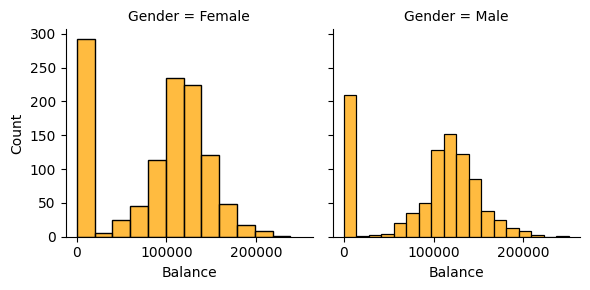

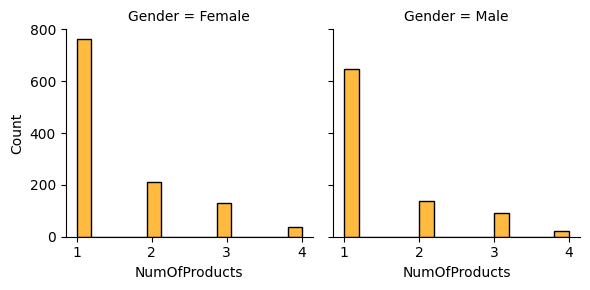

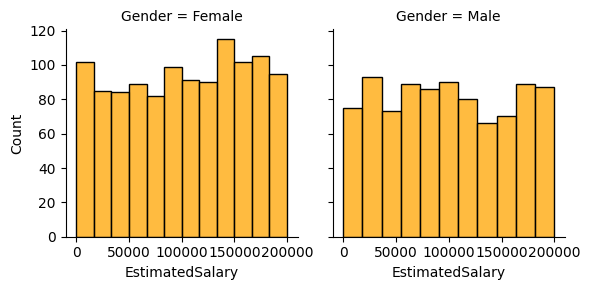

In [17]:
visualizer.facegrid_hist_target(facecol="Gender", color="orange", cols=numerical_columns, target="Exited")

## HasCrCard x Numericals

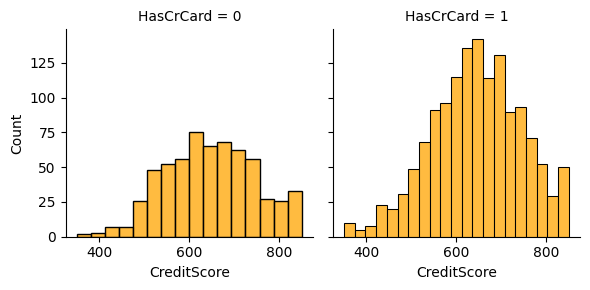

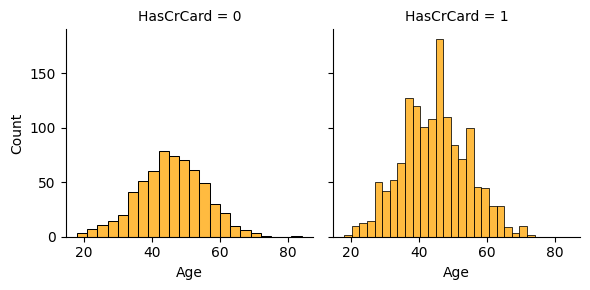

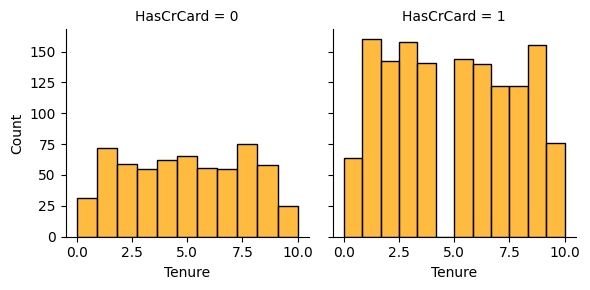

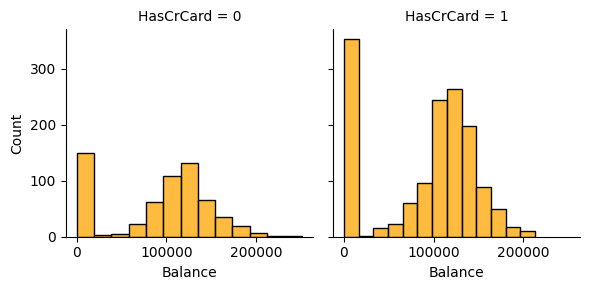

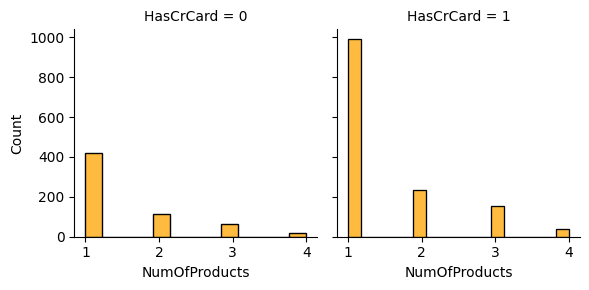

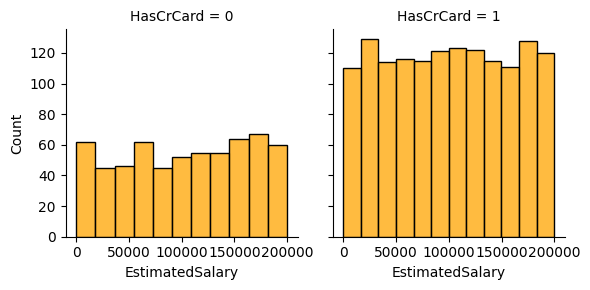

In [18]:
visualizer.facegrid_hist_target(facecol="HasCrCard", color="orange", cols=numerical_columns, target="Exited")

## IsActiveMember x Numericals

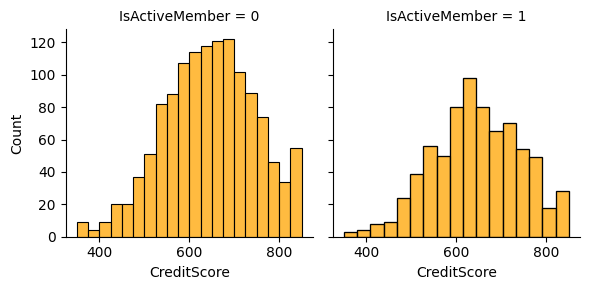

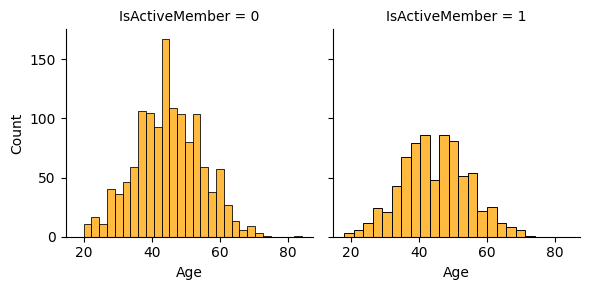

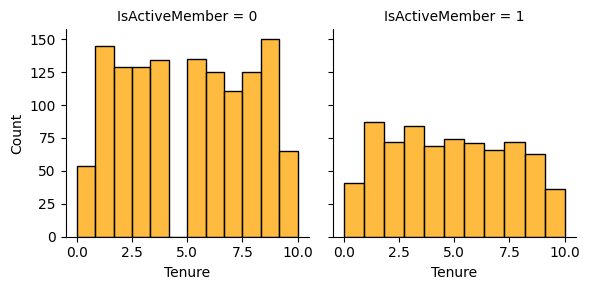

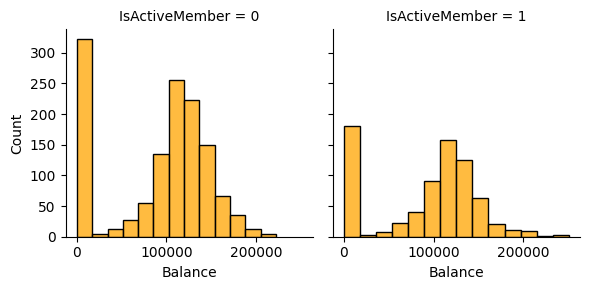

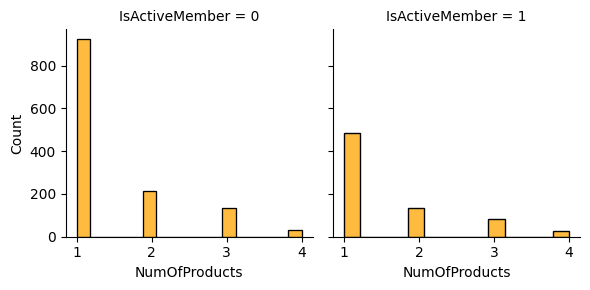

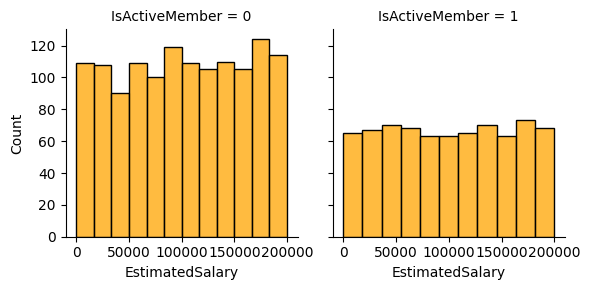

In [19]:
visualizer.facegrid_hist_target(facecol="IsActiveMember", color="orange", cols=numerical_columns, target="Exited")

### Observations:

### Impact:

## Numericals x Numericals

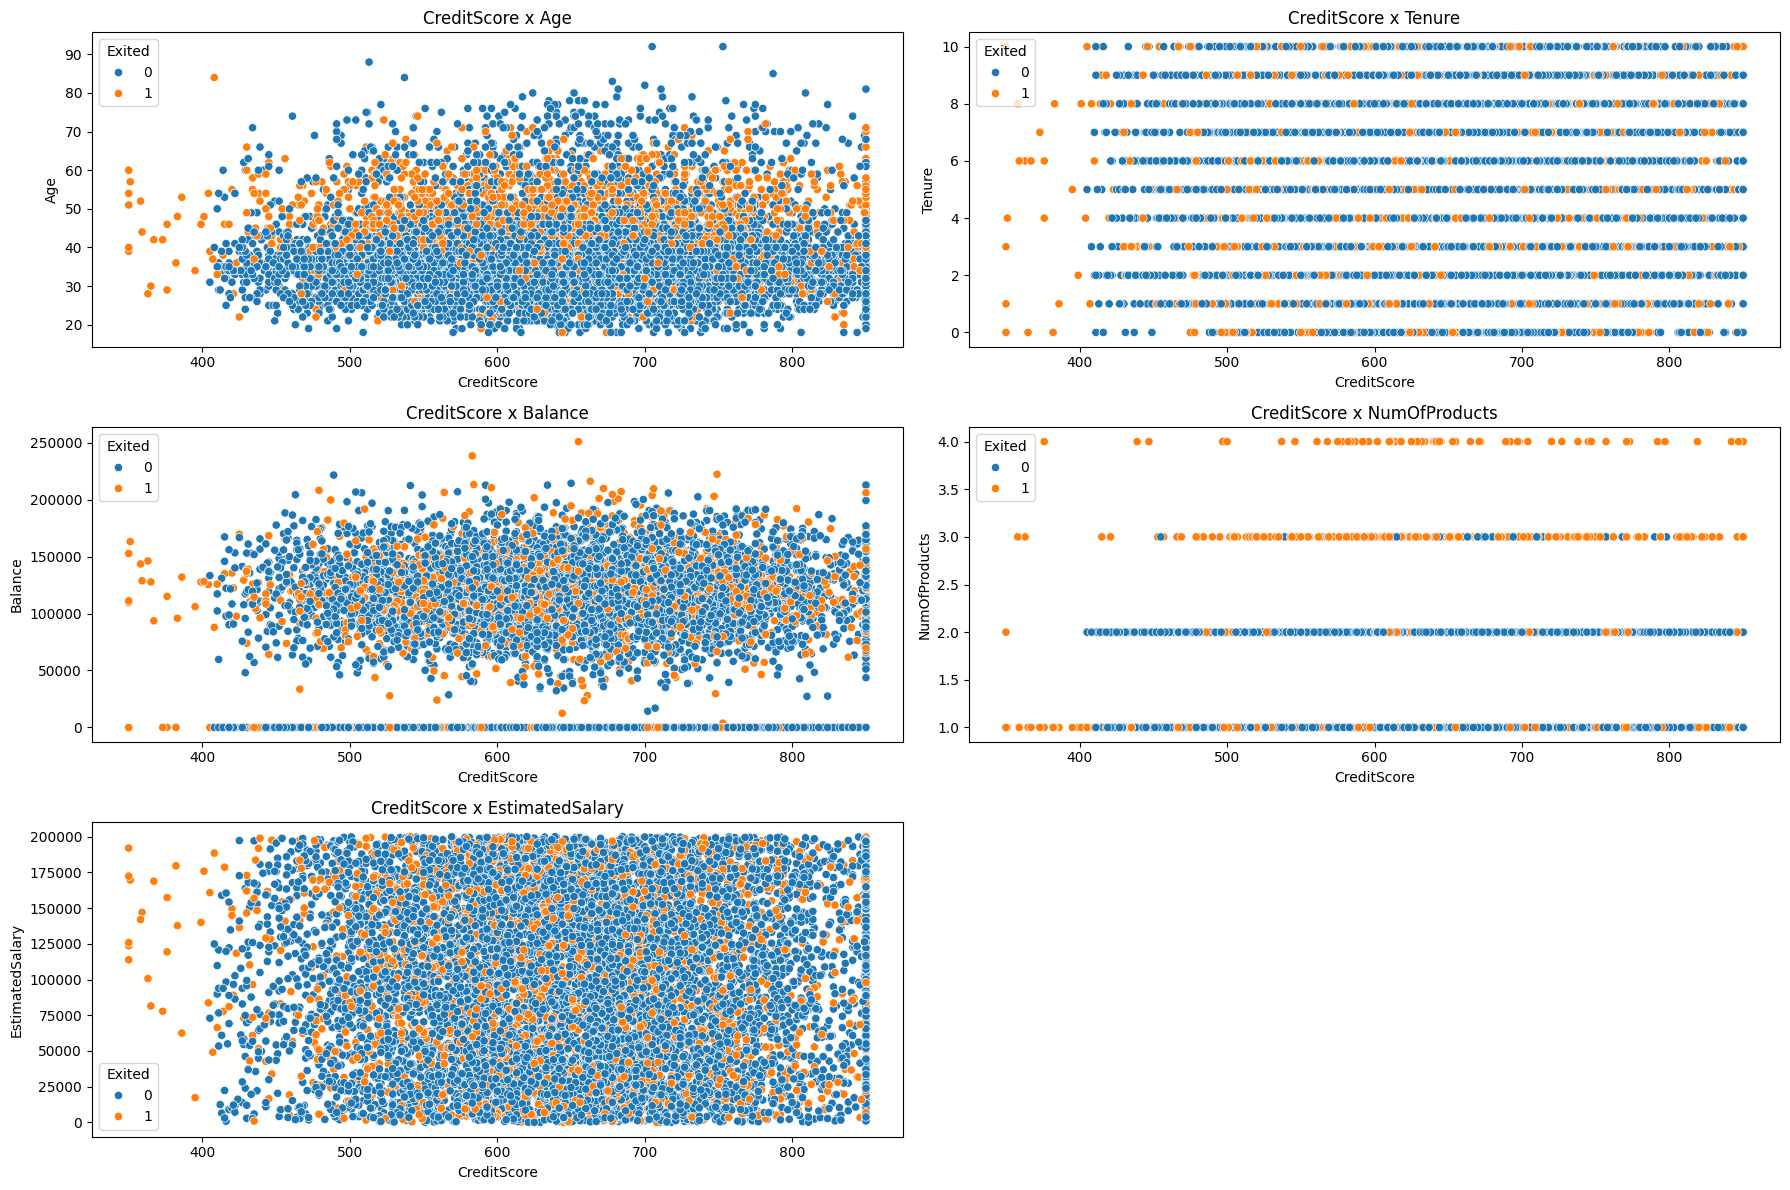

In [20]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "Exited", "CreditScore")

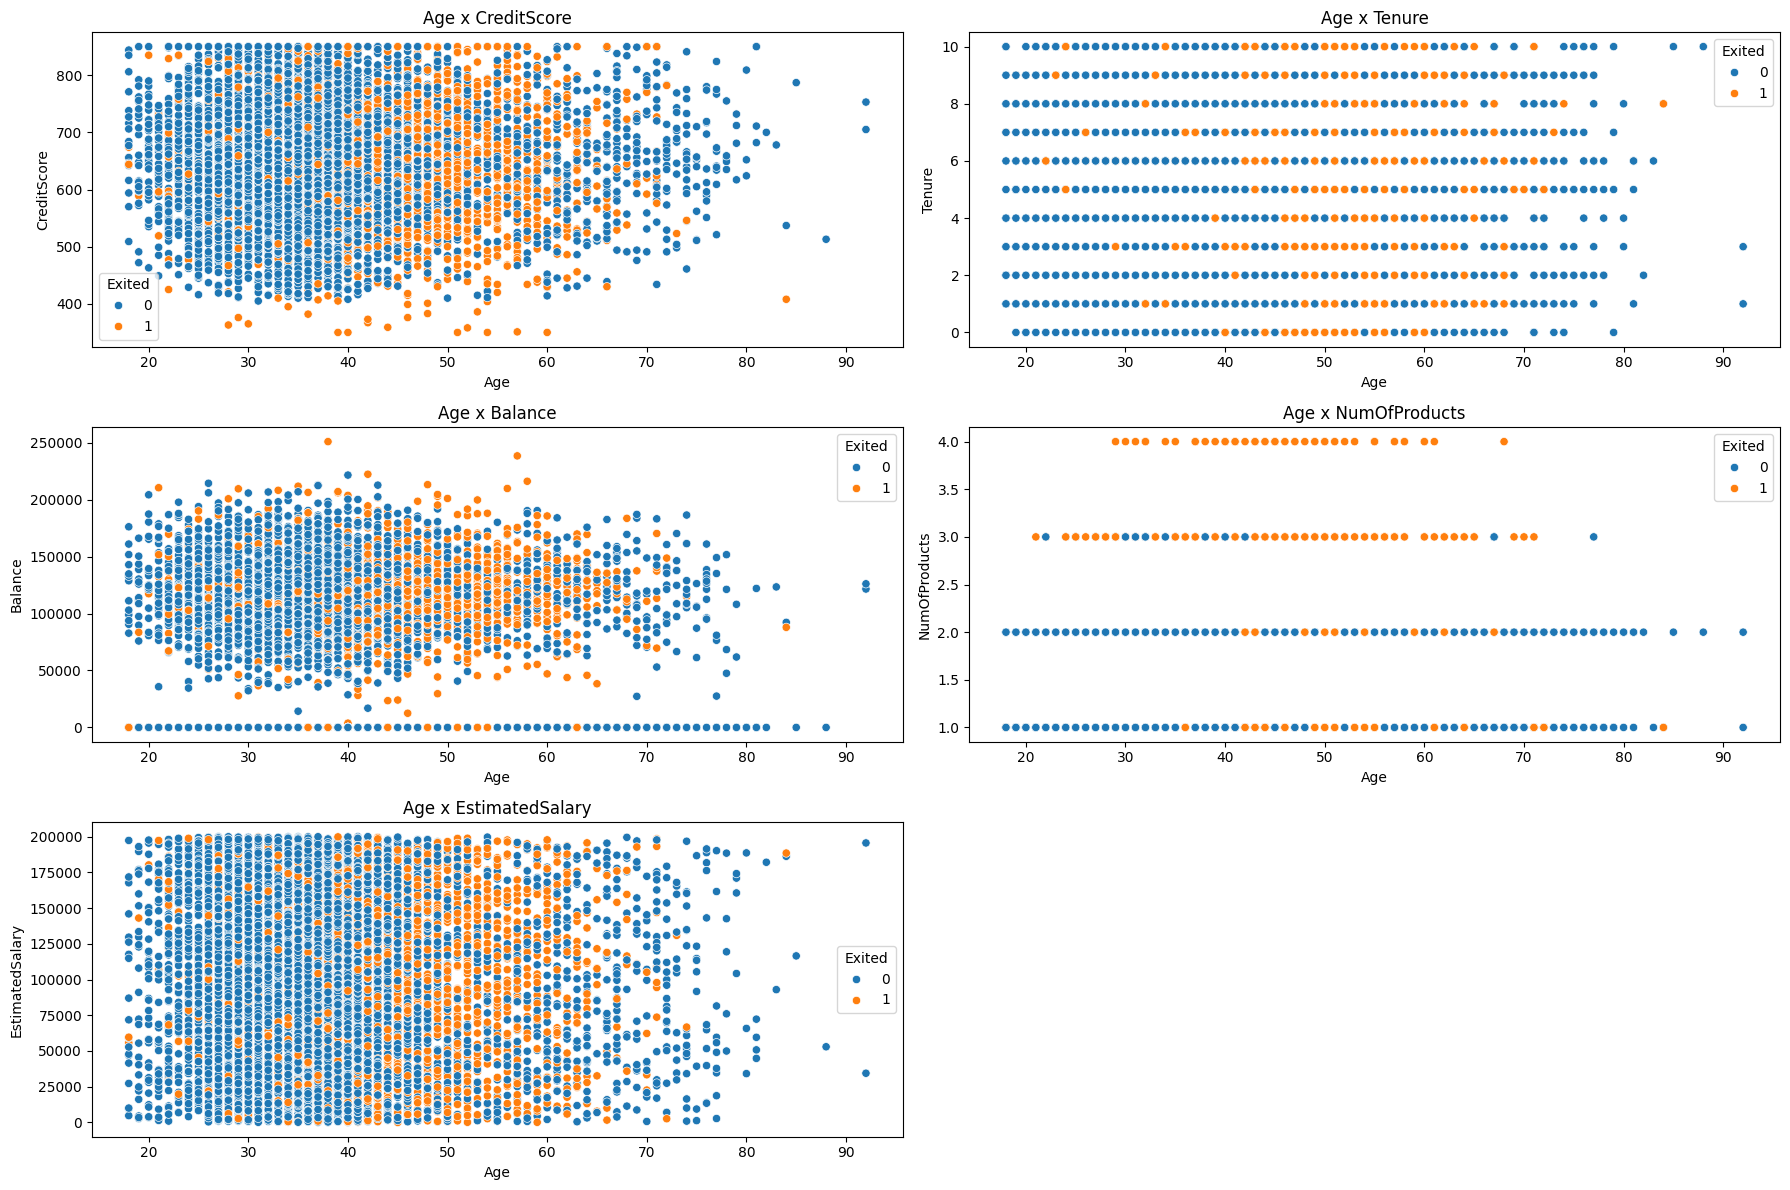

In [21]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "Exited", "Age")

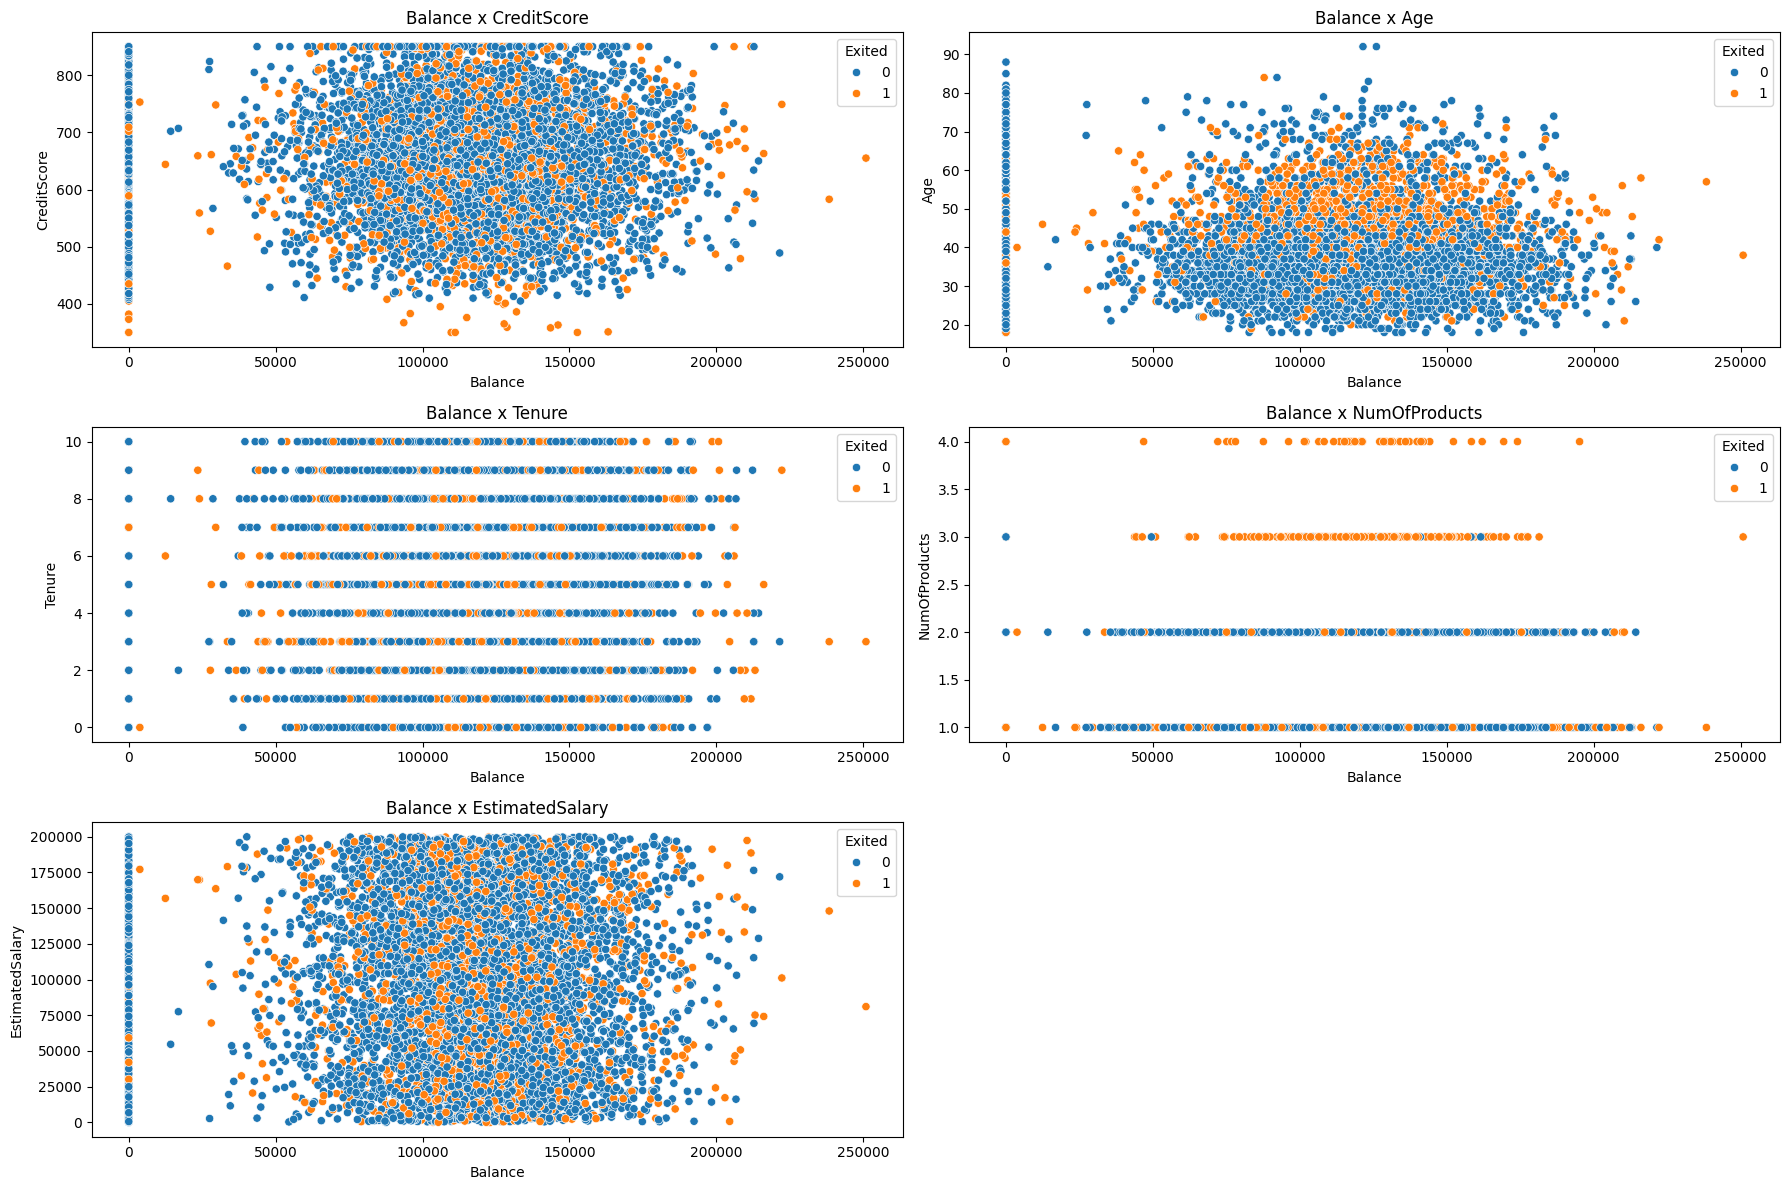

In [22]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "Exited", "Balance")

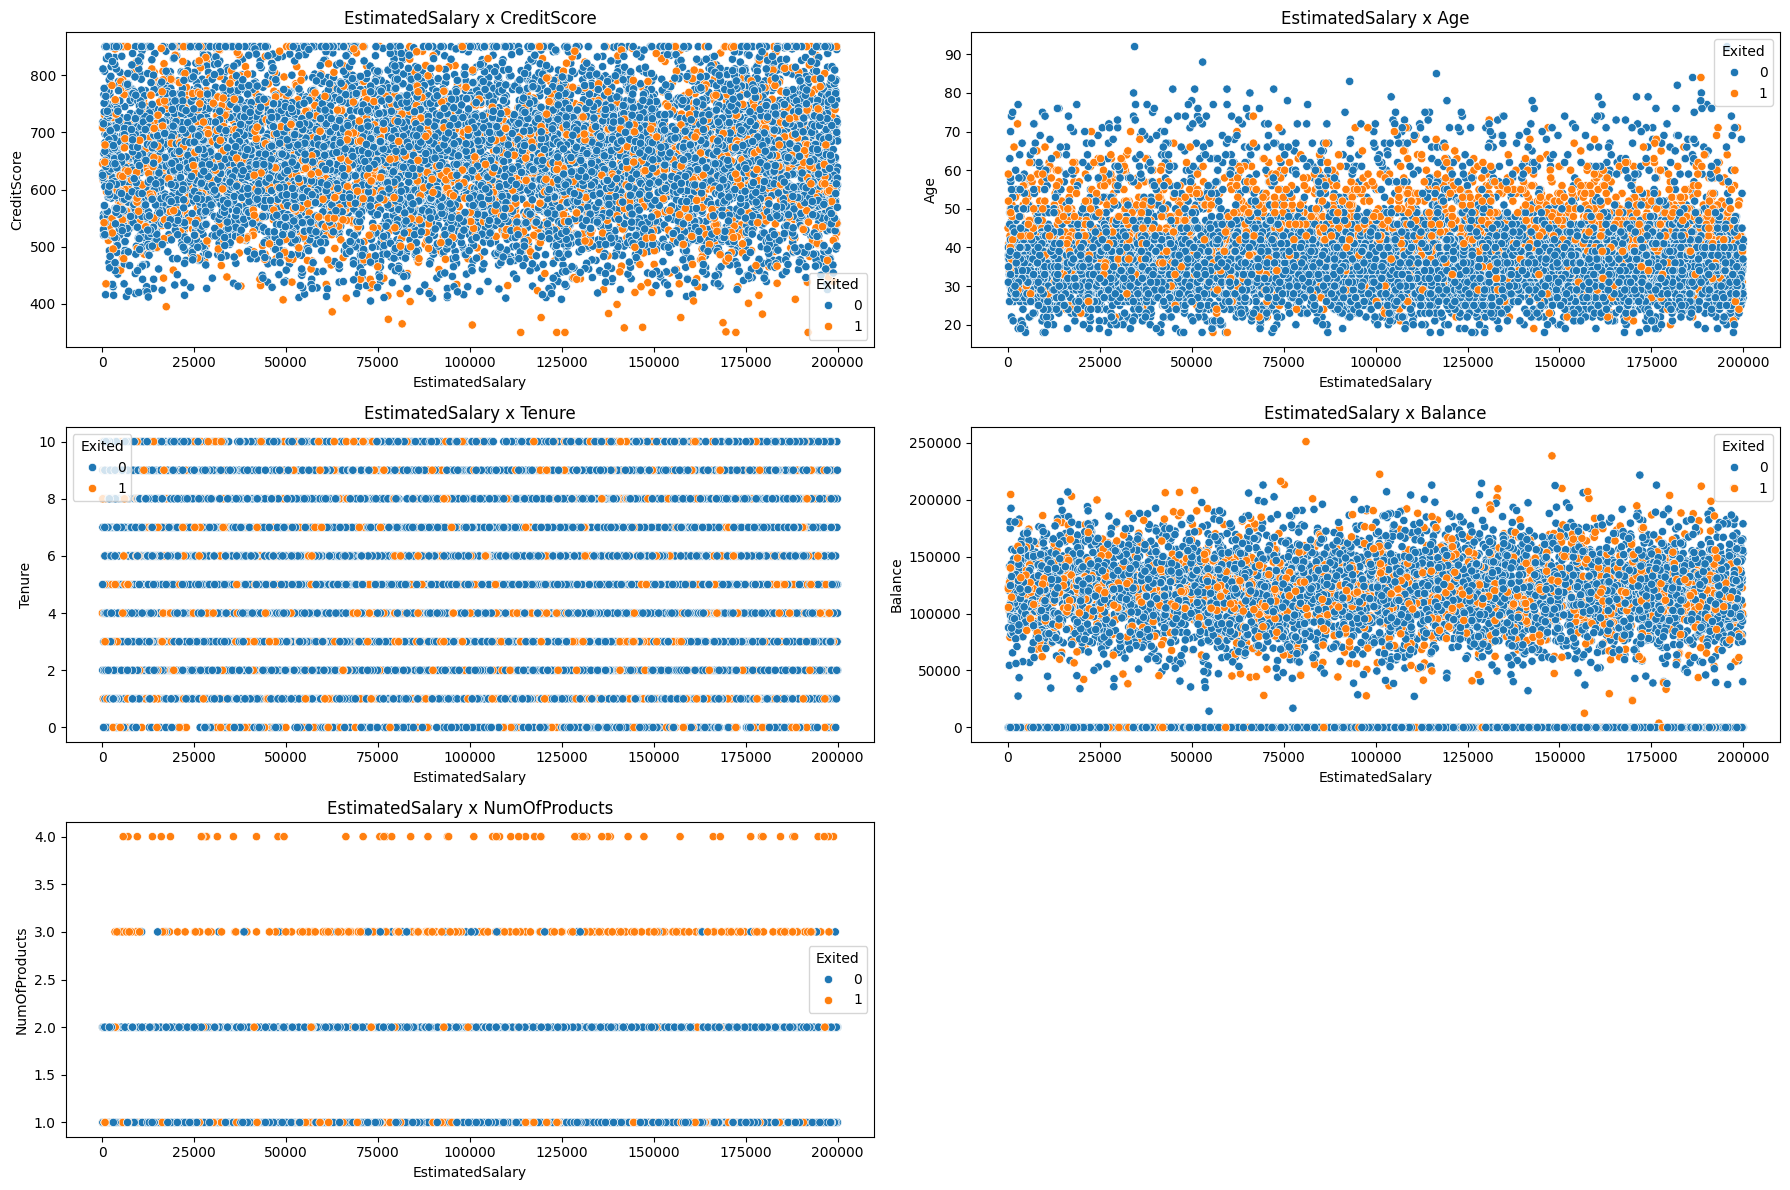

In [23]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "Exited", "EstimatedSalary")

### Observations:

### Impact:

# Summary

### Main Insights:

### Implications for Feature Engineering and Modelling: